In [199]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [103]:
data = pd.read_csv('Dataset/BOW/test.csv', header = None).values

In [104]:
dataset = pd.read_csv('Dataset/train.csv')[['text', 'label']]
dataset.dropna(inplace = True)
dataset.reset_index(drop = True, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 324.5+ KB


In [105]:
label = dataset['label'].head(len(data)).values

In [106]:
xTrain, xTest, yTrain, yTest = train_test_split(data, label, test_size = 0.2, random_state = 0)

## Logistic Regression Model

In [204]:
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)
yPred = classifier.predict(xTest)

score1 = accuracy_score(yTest, yPred)
score2 = precision_score(yTest, yPred)
score3 = recall_score(yTest, yPred)

print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 92.0%
Precision score is: 0.89
Recall score is: 0.93


Text(0.5, 1.0, 'Confusion Matrix, Logistic Regression')

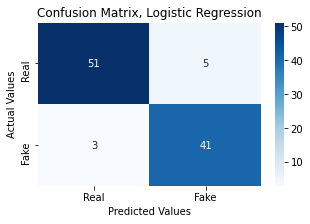

In [207]:
cm = confusion_matrix(yTest,yPred)

plt.figure(figsize = (5,3))
sn.heatmap(data = cm, annot = True, cmap = "Blues", xticklabels = ['Real', 'Fake'], yticklabels = ['Real', 'Fake'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix, Logistic Regression')

## Naive Bayse Model

In [205]:
nbClassifier = MultinomialNB()
nbClassifier.fit(xTrain, yTrain)
nb_y_pred = nbClassifier.predict(xTest)

score1 = accuracy_score(yTest, nb_y_pred)
score2 = precision_score(yTest, nb_y_pred)
score3 = recall_score(yTest, nb_y_pred)

print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 81.0%
Precision score is: 1.0
Recall score is: 0.57


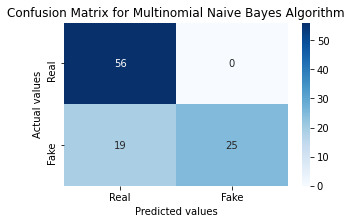

In [211]:
nb_cm = confusion_matrix(yTest, nb_y_pred)
plt.figure(figsize=(5,3))
sn.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()